In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [1]:
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
data =[]
labels = []

parasite = os.listdir("../input/cell_images/cell_images/Parasitized/")
uninfected = os.listdir("../input/cell_images/cell_images/Uninfected/")

Using TensorFlow backend.


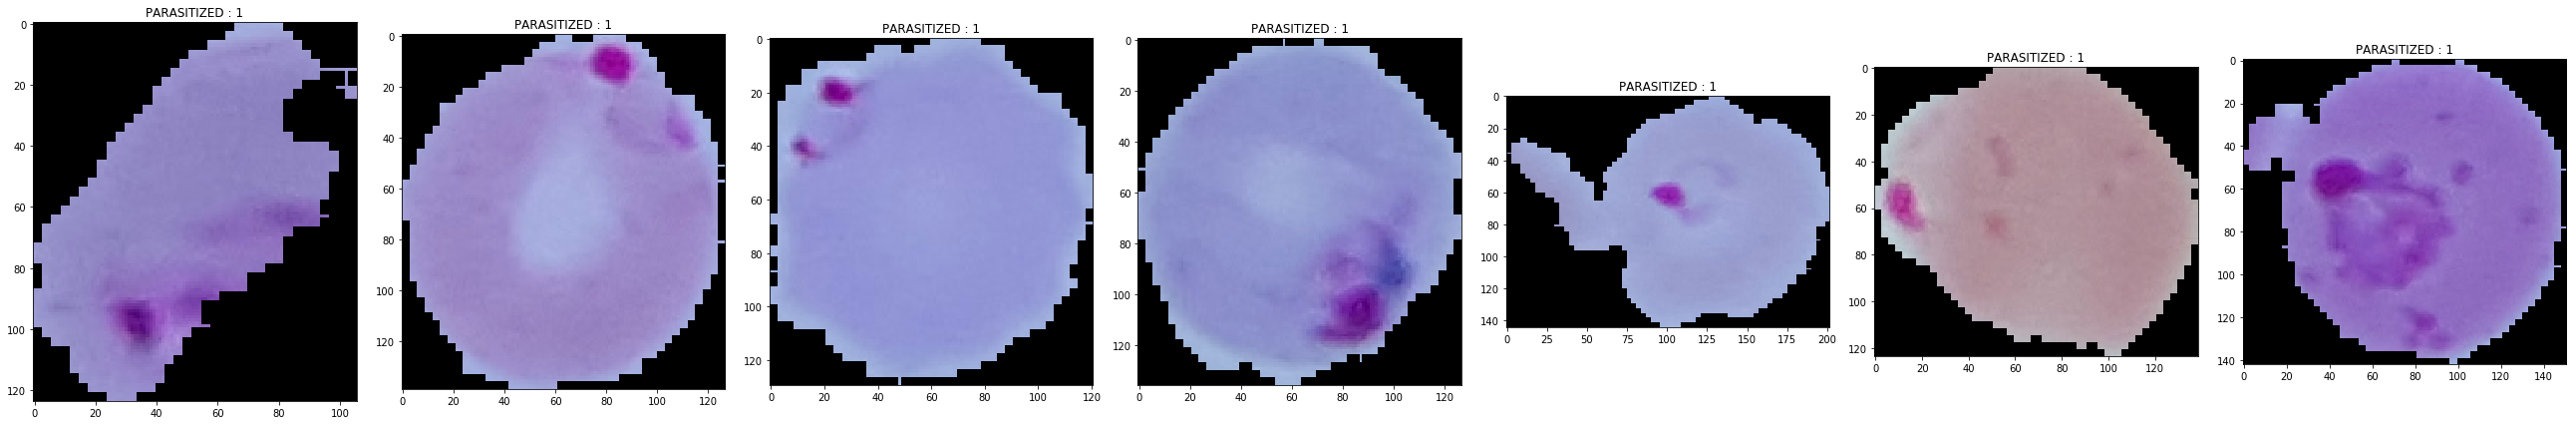

In [20]:
import matplotlib.pyplot as plt 

## Visualize the data 
plt.figure(figsize = (36, 36))
for i in range(7):
    plt.subplot(1, 7, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Parasitized' + "/" + parasite[i*5])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

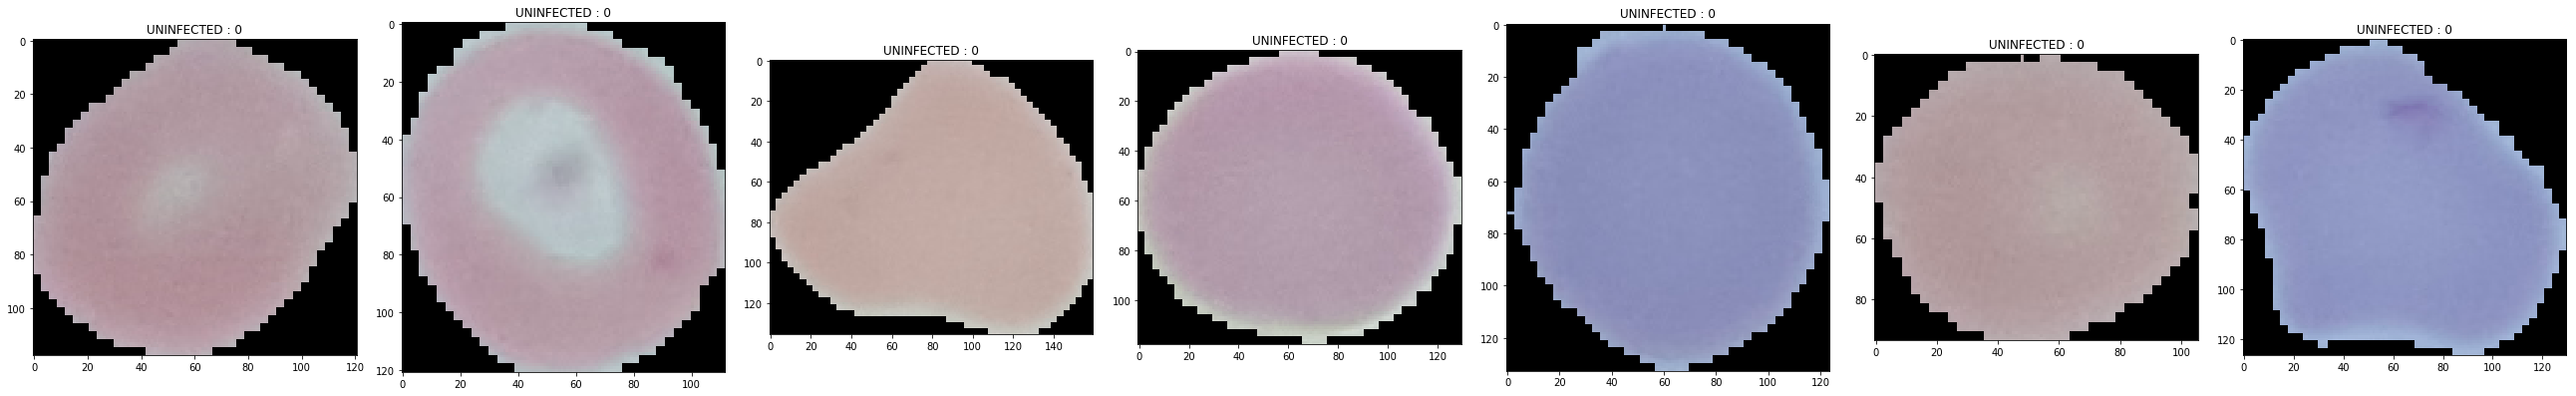

In [21]:
plt.figure(figsize = (36,36))
for i in range(7):
    plt.subplot(1, 7, i+1)
    img = cv2.imread('../input/cell_images/cell_images/Uninfected' + "/" + uninfected[i*7])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()


In [ ]:
from tqdm import tqdm

## Load the data

for pic in tqdm(parasite):
    try:
        image=cv2.imread("../input/cell_images/cell_images/Parasitized/"+pic)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append((1,0))
    except AttributeError:
        print("")

In [ ]:
for pic in tqdm(uninfected):
    try:
        image=cv2.imread("../input/cell_images/cell_images/Uninfected/"+pic)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append((0,1))
    except AttributeError:
        print("")

In [ ]:
data = np.array(data)
labels = np.array(labels)
print(data.shape)
print(labels.shape)

In [ ]:
np.save("224_data",data)
np.save("224_labels",labels)